Quelle: https://datasolut.com/wiki/trainingsdaten-und-testdaten-machine-learning/

# Aufteilung des Datensatzes (splitting)

Um ein Machine Learning Modell korrekt zu trainieren, wird ein Datensatz (Trainingsdaten) benötigt. Unüberwachtes Lernen braucht keine Beispiele und kann direkt mit den Eingabedaten trainiert werden. Überwachtes Lernen hingegen braucht Beispieldaten, also Daten wo die Zielvariable vorgegeben ist (bspw. Kauf Ja/Nein). Diesen Datensatz nennt man auch Beispieldatensatz.

Bei überwachten Lernverfahren wird dieser Datensatz in der Regel in mindestens drei verschiedene Datensätze unterteilt: Training-, Validierung- und Testdaten.

<img src="Train-Test-Validation-Split-1024x434.jpg" alt="Bild" width="50%">


Alle drei Datensätze werden aus dem „Machine Learning Flatfile“ (Beispieldatensatz) erstellt. Eine mögliche Aufteilung könnte folgende sein:

- 70% Trainingsdatensatz
- 20% Validierungsdatensatz
- 10% Testdatensatz

<img src="y_trainX_train.jpg" alt="Bild" width="50%">

Häufig tendieren Algorithmen dazu, bei den gelernten Mustern aus den Trainingsdaten zu einer Überanpassung (im Englischen „Overfitting“). Das heißt, die Zusammenhänge und Beziehungen aus den Trainingsdaten werden von dem Algorithmus zu stark antrainiert und diese Regeln funktionieren für die Gesamtheit nicht gut. 

Testdaten
Die Testdaten sind von den Trainingsdaten unabhängig, sollten jedoch die gleiche Wahrscheinlichkeitsverteilung wie der Trainingsdatensatz aufweisen.

Die Testdaten werden bei dem Training nicht genutzt d.h. der Algorithmus kennt die Daten nicht und kann diese nicht zum Lernen nutzen. Auch hier sind Beispiele bzw. Zielvariablen vorhanden, woran im Anschluss die Qualität des Modells gemessen werden kann.

Wenn das trainierte Modell gut zu den Testdaten passt, d.h. die Beispieldaten mit einer guten Qualität vorhersagt, kann das Modell auf unbekannte (noch zu bewertende) Daten angewandt werden.

Validierungsdaten
Ein Validierungsdatensatz ist ebenfalls ein Beispieldatensatz. Die Validierungsdaten werden für die Abstimmung der Hyperparameter (d.h. für künstliche Neuronale Netzwerke der Architektur) eines Modells verwendet.

So wird vor allem eine Überanpassung des Modells auf die Trainingsdaten vermieden.

# Trennung des Datensatzes in Trainingsdatensatz, Validierungsdatensatz und Testdatensatz

Scikit_Learn Docs: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

train_test_split: Teilt die Daten in 80 % Trainingsdaten und 20 % Testdaten auf. Der random_state sorgt dafür, dass die Aufteilung bei jeder Ausführung gleich bleibt (Reproduzierbarkeit).

In [2]:
# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

`random_state = 42` ist wie `random_seed = 42`.
Es sorgt für die reproduzierarkeit der zufälligen Aufteilung des Datensatzes. 

# Beispiel

Genauigkeit des Modells: 0.95


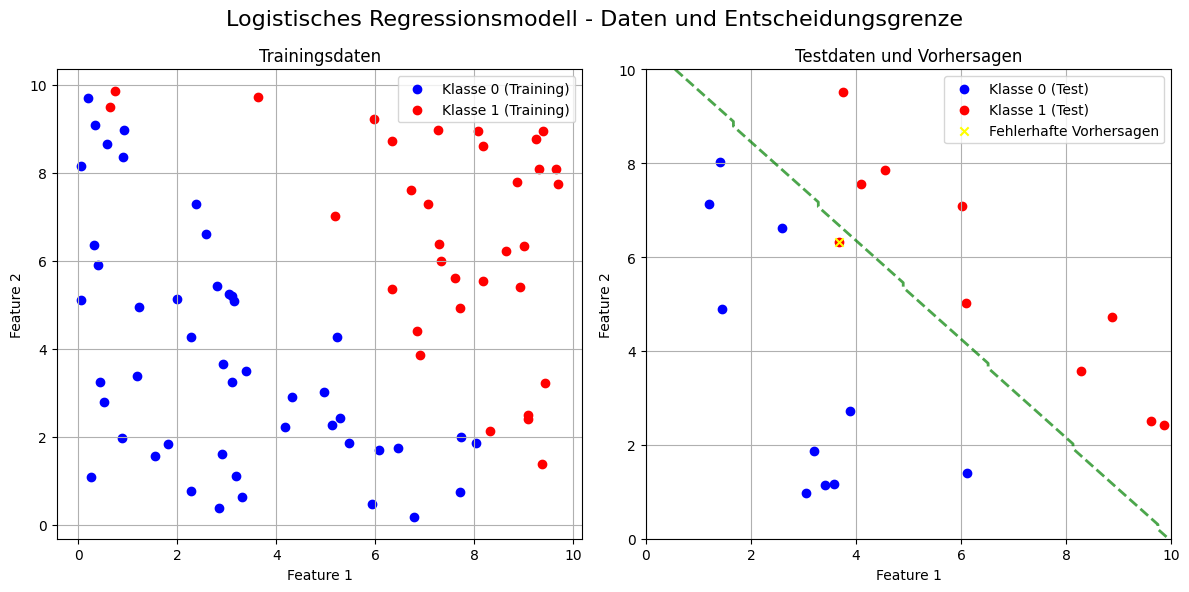

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Simulierter Datensatz
# Features: Punkte in einem 2D-Raum
np.random.seed(42)
X = np.random.rand(100, 2) * 10  # 100 Punkte mit 2 Features (0-10)
y = (X[:, 0] + X[:, 1] > 10).astype(int)  # Regel: Summe der Koordinaten > 10 → Klasse 1, sonst Klasse 0

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell initialisieren und trainieren
model = LogisticRegression()
model.fit(X_train, y_train)

# Vorhersagen auf Testdaten
y_pred = model.predict(X_test)

# Genauigkeit ausgeben
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit des Modells: {accuracy:.2f}")

# Visualisierung der Trainings- und Testdaten
plt.figure(figsize=(12, 6))

# Subplot 1: Trainingsdaten
plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='Klasse 0 (Training)')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Klasse 1 (Training)')
plt.title('Trainingsdaten')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

# Subplot 2: Testdaten mit Vorhersagen
plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='blue', label='Klasse 0 (Test)')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='red', label='Klasse 1 (Test)')
plt.scatter(X_test[y_pred != y_test, 0], X_test[y_pred != y_test, 1], color='yellow', label='Fehlerhafte Vorhersagen', marker='x')
plt.title('Testdaten und Vorhersagen')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

# Entscheidungsgrenze plotten
xx, yy = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0.5], colors='green', linestyles='--', linewidths=2, alpha=0.7)
plt.suptitle('Logistisches Regressionsmodell - Daten und Entscheidungsgrenze', fontsize=16)
plt.tight_layout()
plt.show()


Hier ist ein vollständiges Beispiel für das Training und die Visualisierung eines Machine Learning-Modells. Wir trainieren ein Modell auf einem Beispiel-Datensatz und visualisieren sowohl die Datenpunkte als auch die Entscheidungsgrenze des Modells. 

---

### **Code mit Visualisierung**

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Simulierter Datensatz
# Features: Punkte in einem 2D-Raum
np.random.seed(42)
X = np.random.rand(100, 2) * 10  # 100 Punkte mit 2 Features (0-10)
y = (X[:, 0] + X[:, 1] > 10).astype(int)  # Regel: Summe der Koordinaten > 10 → Klasse 1, sonst Klasse 0

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell initialisieren und trainieren
model = LogisticRegression()
model.fit(X_train, y_train)

# Vorhersagen auf Testdaten
y_pred = model.predict(X_test)

# Genauigkeit ausgeben
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit des Modells: {accuracy:.2f}")

# Visualisierung der Trainings- und Testdaten
plt.figure(figsize=(12, 6))

# Subplot 1: Trainingsdaten
plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='Klasse 0 (Training)')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Klasse 1 (Training)')
plt.title('Trainingsdaten')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

# Subplot 2: Testdaten mit Vorhersagen
plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='blue', label='Klasse 0 (Test)')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='red', label='Klasse 1 (Test)')
plt.scatter(X_test[y_pred != y_test, 0], X_test[y_pred != y_test, 1], color='yellow', label='Fehlerhafte Vorhersagen', marker='x')
plt.title('Testdaten und Vorhersagen')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

# Entscheidungsgrenze plotten
xx, yy = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0.5], colors='green', linestyles='--', linewidths=2, alpha=0.7)
plt.suptitle('Logistisches Regressionsmodell - Daten und Entscheidungsgrenze', fontsize=16)
plt.tight_layout()
plt.show()
```

---

### **Was passiert hier?**

1. **Datensatz:**
   - Wir erzeugen 100 Punkte in einem 2D-Raum (`X`), wobei jede Punktkoordinate zwischen 0 und 10 liegt.
   - Die Zielvariable `y` wird basierend auf einer Regel erstellt: Die Summe der Koordinaten bestimmt die Klasse.

2. **Datenaufteilung:**
   - Mit `train_test_split` teilen wir die Daten in 80 % Training und 20 % Test auf.

3. **Modelltraining:**
   - Wir trainieren ein **LogisticRegression-Modell** auf den Trainingsdaten.

4. **Vorhersage und Bewertung:**
   - Mit `model.predict` treffen wir Vorhersagen für die Testdaten und berechnen die Genauigkeit mit `accuracy_score`.

5. **Visualisierung:**
   - Zwei Subplots zeigen:
     - **Trainingsdaten** mit ihren jeweiligen Klassen.
     - **Testdaten** inklusive falscher Vorhersagen (gelb markiert).
   - Die **Entscheidungsgrenze** des Modells wird als gestrichelte grüne Linie dargestellt.

---

### **Beispielausgabe der Genauigkeit**
```plaintext
Genauigkeit des Modells: 0.95
```

### **Beispielgrafik**
- Linker Teil: Die aufgeteilten Trainingsdaten.
- Rechter Teil: Testdaten mit falsch klassifizierten Punkten (falls vorhanden) und die Entscheidungsgrenze.

---

Das Modell erlaubt es, den Zusammenhang zwischen den beiden Features zu visualisieren, inklusive der Vorhersagefehler. Möchtest du, dass ich diese Visualisierung mit echten Bitcoin-Daten erweitere?